# Movie Genre Classification



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [2]:

train_data = pd.read_csv("train.csv")
train_data

,id,movie_name,synopsis,genre
0,44978,Super Me,A young scriptwriter starts bringing valuable ...,fantasy
1,50185,Entity Project,A director and her friends renting a haunted h...,horror
2,34131,Behavioral Family Therapy for Serious Psychiat...,This is an educational video for families and ...,family
3,78522,Blood Glacier,Scientists working in the Austrian Alps discov...,scifi
4,2206,Apat na anino,Buy Day - Four Men Widely - Apart in Life - By...,action
...,...,...,...,...
53995,80325,Untitled Monkeyshine/Ugly Brother Project,Two loser pest control buddies find themselves...,scifi
53996,84712,The Great Swindle,A seductive woman gets involved in relationshi...,thriller
53997,69801,When Men Get Pregnant,"Duyen, a wedding dress staff, who decides to c...",romance
53998,7678,Suttu Pidikka Utharavu,The people of a crowded colony in Coimbatore c...,action


In [3]:
test_data = pd.read_csv("test.csv")
test_data

,id,movie_name,synopsis,genre
0,16863,A Death Sentence,"12 y.o. Ida's dad'll die without a DKK1,500,00...",action
1,48456,Intermedio,A group of four teenage friends become trapped...,action
2,41383,30 Chua Phai Tet,A guy left his home for 12 years till he came ...,action
3,84007,Paranoiac,A man long believed dead returns to the family...,action
4,40269,Ordinary Happiness,"After a deadly accident, Paolo comes back on E...",action
...,...,...,...,...
35995,73156,Mysterious Doctor Satan,A mad scientist plots the domination of Americ...,action
35996,21242,Blondes at Work,Steve promises his captain not to favor Torchy...,action
35997,70135,The Hurricane,A Polynesian sailor unjustly imprisoned after ...,action
35998,85987,Malayankunju,Anikkuttan is an ill-tempered electronics tech...,action


In [4]:
train_data.describe()

,id
count,54000.000000
mean,44994.882352
std,25980.135904
min,0.000000
25%,22569.750000
50%,45000.000000
75%,67466.250000
max,89999.000000


In [5]:
test_data.describe()

,id
count,36000.000000
mean,45006.426472
std,25982.421537
min,1.000000
25%,22431.750000
50%,44998.500000
75%,67539.500000
max,89998.000000


In [6]:
train_data.isnull().sum()

id            0
movie_name    0
synopsis      0
genre         0
dtype: int64

In [7]:
test_data.isnull().sum()

id            0
movie_name    0
synopsis      0
genre         0
dtype: int64

In [8]:
class_distribution = train_data['genre'].value_counts()
print("Class Distribution:")
print(class_distribution)

Class Distribution:
fantasy      5400
horror       5400
family       5400
scifi        5400
action       5400
crime        5400
adventure    5400
mystery      5400
romance      5400
thriller     5400
Name: genre, dtype: int64


In [9]:
imbalance_ratio = class_distribution.min() / class_distribution.max()
print("Imbalance Ratio:", imbalance_ratio)

Imbalance Ratio: 1.0


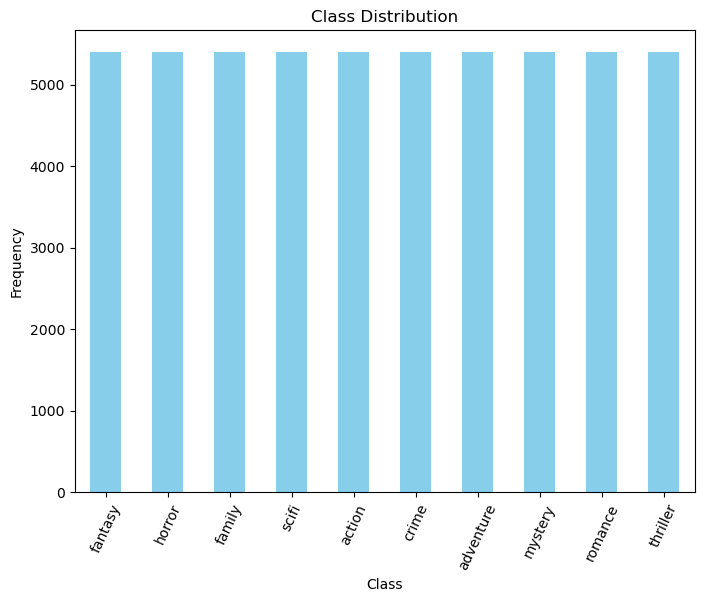

In [10]:
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=65)
plt.show()

## Modeling

In [17]:
from sklearn.linear_model import LogisticRegression
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['synopsis'])
y_train = train_data['genre']  


lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train_tfidf, y_train)

y_train_pred = lr_classifier.predict(X_train_tfidf)

print("Accuracy on training set:", accuracy_score(y_train, y_train_pred))
print("Classification Report on training set:\n", classification_report(y_train, y_train_pred))


Accuracy on training set: 0.4822962962962963
Classification Report on training set:
               precision    recall  f1-score   support

      action       0.45      0.41      0.43      5400
   adventure       0.44      0.38      0.41      5400
       crime       0.48      0.51      0.49      5400
      family       0.50      0.58      0.54      5400
     fantasy       0.47      0.41      0.43      5400
      horror       0.51      0.57      0.54      5400
     mystery       0.44      0.42      0.43      5400
     romance       0.54      0.66      0.60      5400
       scifi       0.51      0.60      0.55      5400
    thriller       0.43      0.29      0.35      5400

    accuracy                           0.48     54000
   macro avg       0.48      0.48      0.48     54000
weighted avg       0.48      0.48      0.48     54000



In [18]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['synopsis'])
y_train = train_data['genre']  


nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)


y_train_pred = nb_classifier.predict(X_train_tfidf)


print("Accuracy on training set:", accuracy_score(y_train, y_train_pred))
print("Classification Report on training set:\n", classification_report(y_train, y_train_pred))


Accuracy on training set: 0.4514074074074074
Classification Report on training set:
               precision    recall  f1-score   support

      action       0.43      0.36      0.39      5400
   adventure       0.41      0.33      0.36      5400
       crime       0.44      0.52      0.48      5400
      family       0.48      0.53      0.51      5400
     fantasy       0.43      0.37      0.40      5400
      horror       0.47      0.56      0.51      5400
     mystery       0.41      0.39      0.40      5400
     romance       0.49      0.66      0.56      5400
       scifi       0.48      0.58      0.53      5400
    thriller       0.41      0.22      0.28      5400

    accuracy                           0.45     54000
   macro avg       0.45      0.45      0.44     54000
weighted avg       0.45      0.45      0.44     54000



## Prediction

In [19]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_test = tfidf_vectorizer.fit_transform(test_data['synopsis'])

In [20]:
X_test_predictions = nb_classifier.predict(X_test)
test_data['Predicted_Genre'] = X_test_predictions

In [21]:
test_data.to_csv('predicted_genres.csv', index=False)

print(test_data)

          id               movie_name  \
0      16863         A Death Sentence   
1      48456               Intermedio   
2      41383         30 Chua Phai Tet   
3      84007                Paranoiac   
4      40269       Ordinary Happiness   
...      ...                      ...   
35995  73156  Mysterious Doctor Satan   
35996  21242          Blondes at Work   
35997  70135            The Hurricane   
35998  85987             Malayankunju   
35999   7302             Mr. Nice Guy   

                                                synopsis   genre  \
0      12 y.o. Ida's dad'll die without a DKK1,500,00...  action   
1      A group of four teenage friends become trapped...  action   
2      A guy left his home for 12 years till he came ...  action   
3      A man long believed dead returns to the family...  action   
4      After a deadly accident, Paolo comes back on E...  action   
...                                                  ...     ...   
35995  A mad scientist plots th

## Model Pickling/Serialization

In [22]:
import pickle
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)
with open('nb_classifier.pkl', 'wb') as file:
    pickle.dump(nb_classifier, file)

print("Models pickled successfully.")

Models pickled successfully.
